# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies & Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key.
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude.
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations.
lat_lngs = []

# Empty list for holding the cities names.
cities = []

# Range of latitudes and longitudes.
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat and lng combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
print(f'Number of cities in the list: {len(cities)}')

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL.
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city.
city_data = []

# Print to logger.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city.
    city_url = f'{url}appid={weather_api_key}&units=imperial&q={city}'
    
    # Log the URL, record, and set numbers.
    print('Processing Record %s of Set %s | %s' % (record_count, set_count, city))

    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list.
        city_data.append({'City': city, 
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})

    # If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass
              
# Indicate that Data Loading is complete.
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | poum
Processing Record 2 of Set 1 | istok
Processing Record 3 of Set 1 | kodra
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | liverpool
Processing Record 8 of Set 1 | san quintin
Processing Record 9 of Set 1 | temyasovo
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | pereslavl-zalesskiy
Processing Record 14 of Set 1 | caravelas
Processing Record 15 of Set 1 | hobyo
Processing Record 16 of Set 1 | luanda
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | marzuq
Processing Record 19 of Set 1 | marsabit
Processing Record 20 of Set 1 | qiongshan
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | kalmunai
Processing Re

Processing Record 40 of Set 4 | mount gambier
Processing Record 41 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 42 of Set 4 | georgiu-dezh
City not found. Skipping...
Processing Record 43 of Set 4 | waipawa
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | mugur-aksy
Processing Record 46 of Set 4 | sur
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | fairbanks
Processing Record 49 of Set 4 | ugoofaaru
Processing Record 0 of Set 5 | souillac
Processing Record 1 of Set 5 | kutoarjo
Processing Record 2 of Set 5 | samarai
Processing Record 3 of Set 5 | balkanabat
Processing Record 4 of Set 5 | okhotsk
Processing Record 5 of Set 5 | rafai
Processing Record 6 of Set 5 | jinchang
Processing Record 7 of Set 5 | keuruu
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | danville
Processing Record 10 of Set 5 | barcelos
Processing Record 11 of Set 5 | cayenne
Processing Record 12 of Set 5 | mtambile
Pro

Processing Record 25 of Set 8 | olafsvik
Processing Record 26 of Set 8 | uglekamensk
Processing Record 27 of Set 8 | ahipara
Processing Record 28 of Set 8 | abashiri
Processing Record 29 of Set 8 | wajima
Processing Record 30 of Set 8 | cascais
Processing Record 31 of Set 8 | pasighat
Processing Record 32 of Set 8 | luorong
Processing Record 33 of Set 8 | bosaso
Processing Record 34 of Set 8 | faya
Processing Record 35 of Set 8 | pasni
Processing Record 36 of Set 8 | severo-kurilsk
Processing Record 37 of Set 8 | atambua
Processing Record 38 of Set 8 | provideniya
Processing Record 39 of Set 8 | balotra
Processing Record 40 of Set 8 | harqalah
Processing Record 41 of Set 8 | eyemouth
Processing Record 42 of Set 8 | lewes
Processing Record 43 of Set 8 | kankon
Processing Record 44 of Set 8 | taunggyi
Processing Record 45 of Set 8 | tanout
Processing Record 46 of Set 8 | havoysund
Processing Record 47 of Set 8 | emerald
Processing Record 48 of Set 8 | arica
Processing Record 49 of Set 8 

Processing Record 15 of Set 12 | salalah
Processing Record 16 of Set 12 | margate
Processing Record 17 of Set 12 | mizpe ramon
City not found. Skipping...
Processing Record 18 of Set 12 | anito
Processing Record 19 of Set 12 | shurugwi
Processing Record 20 of Set 12 | alyangula
Processing Record 21 of Set 12 | launceston
Processing Record 22 of Set 12 | hamilton
Processing Record 23 of Set 12 | botwood
Processing Record 24 of Set 12 | umred
Processing Record 25 of Set 12 | baiquan
Processing Record 26 of Set 12 | khor
Processing Record 27 of Set 12 | puerto madryn
Processing Record 28 of Set 12 | boden
Processing Record 29 of Set 12 | inhambane
Processing Record 30 of Set 12 | puerto escondido
Processing Record 31 of Set 12 | saint-augustin
Processing Record 32 of Set 12 | umea
Processing Record 33 of Set 12 | turiacu
Processing Record 34 of Set 12 | alofi
Processing Record 35 of Set 12 | baherden
Processing Record 36 of Set 12 | xingcheng
Processing Record 37 of Set 12 | mgandu
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Show record count.
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Display sample data.
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,poum,-20.2333,164.0167,80.40,84,100,17.25,NC,1675854408
1,istok,42.7808,20.4875,28.06,60,77,5.03,XK,1675854581
2,kodra,50.5949,29.5587,26.31,66,5,3.42,UA,1675854582
3,saldanha,-33.0117,17.9442,71.22,67,13,14.50,ZA,1675854582
4,atuona,-9.8000,-139.0333,77.95,78,70,16.17,PF,1675854583


In [7]:
# Export the City_Data into a .csv file.
city_data_df.to_csv('output_data/cities.csv', index_label='City_ID')

In [8]:
# Read saved data.
city_data_df = pd.read_csv('output_data/cities.csv', index_col='City_ID')

# Display sample data.
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poum,-20.2333,164.0167,80.40,84,100,17.25,NC,1675854408
1,istok,42.7808,20.4875,28.06,60,77,5.03,XK,1675854581
2,kodra,50.5949,29.5587,26.31,66,5,3.42,UA,1675854582
3,saldanha,-33.0117,17.9442,71.22,67,13,14.50,ZA,1675854582
4,atuona,-9.8000,-139.0333,77.95,78,70,16.17,PF,1675854583


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

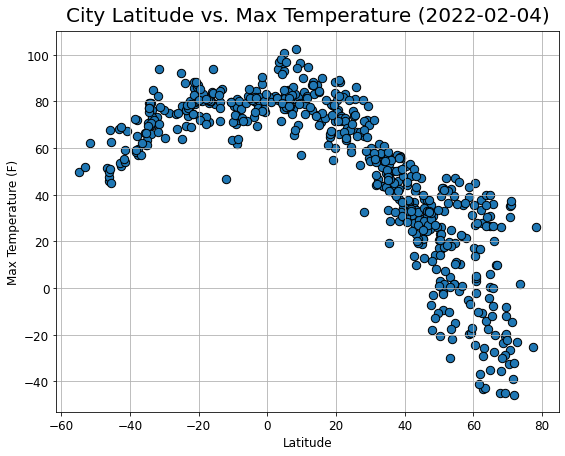

In [9]:
# Build a scatter plot for latitude vs. temperature.
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.figure(figsize=[9, 7])
plt.scatter(x_axis, y_axis, edgecolors='black', s=70)

# Incorporate the other graph properties.
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=12)
plt.title('City Latitude vs. Max Temperature (2022-02-08)', fontsize=20, pad=10)

# Save the figure.
plt.savefig('output_data/Fig1.png')

# Show the plot.
plt.show()

#### Latitude Vs. Humidity

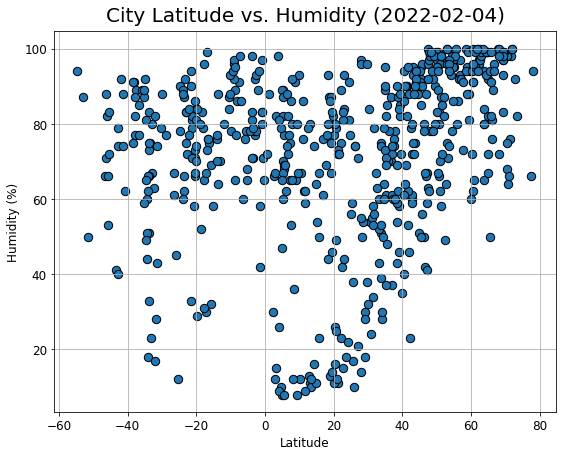

In [10]:
# Build a scatter plot for latitude vs. humidity.
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.figure(figsize=[9, 7])
plt.scatter(x_axis, y_axis, edgecolors='black', s=70)

# Incorporate the other graph properties.
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.title('City Latitude vs. Humidity (2022-02-08)', fontsize=20, pad=10)

# Save the figure.
plt.savefig('output_data/Fig2.png')

# Show the plot.
plt.show()

#### Latitude Vs. Cloudiness

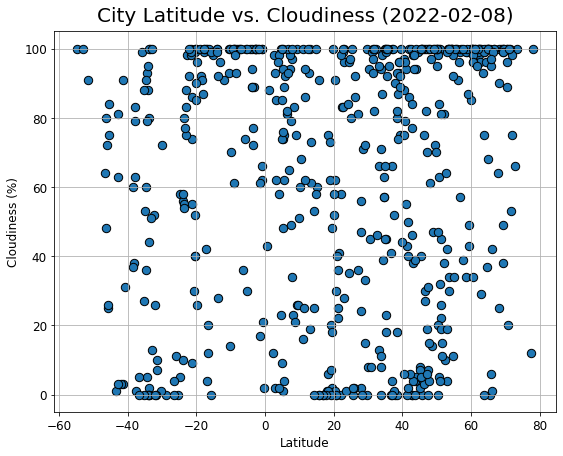

In [11]:
# Build a scatter plot for latitude vs. cloudiness.
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.figure(figsize=[9, 7])
plt.scatter(x_axis, y_axis, edgecolors='black', s=70)

# Incorporate the other graph properties.
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.title('City Latitude vs. Cloudiness (2022-02-08)', fontsize=20, pad=10)

# Save the figure.
plt.savefig('output_data/Fig3.png')

# Show the plot.
plt.show()

#### Latitude vs. Wind Speed Plot

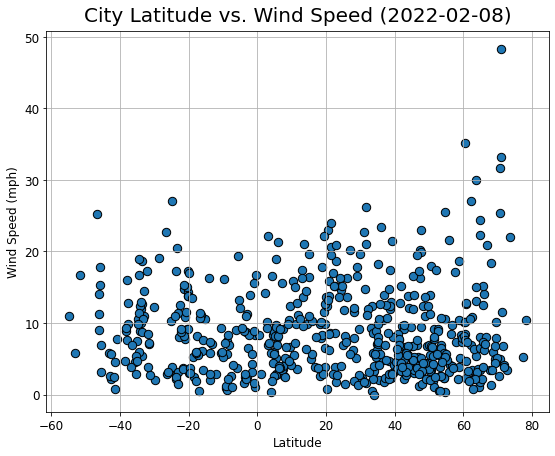

In [12]:
# Build a scatter plot for latitude vs. wind speed.
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.figure(figsize=[9, 7])
plt.scatter(x_axis, y_axis, edgecolors='black', s=70)

# Incorporate the other graph properties.
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.title('City Latitude vs. Wind Speed (2022-02-08)', fontsize=20, pad=10)

# Save the figure.
plt.savefig("output_data/Fig4.png")

# Show the plot.
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create linear regression plots.
def linear_regress(x_values, y_values, x_label, y_label, xy_string):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    plt.figure(figsize=[9, 7])
    plt.scatter(x_values, y_values, s=70)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, xy_string, fontsize=20, color='red')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    print(f'The r-value is: {rvalue}')
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0).
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data.
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,istok,42.7808,20.4875,28.06,60,77,5.03,XK,1675854581
2,kodra,50.5949,29.5587,26.31,66,5,3.42,UA,1675854582
6,liverpool,53.4106,-2.9779,42.62,71,100,6.93,GB,1675854583
7,san quintin,30.4833,-115.9500,55.31,54,45,2.26,MX,1675854584
8,temyasovo,52.9933,58.1014,19.60,75,4,5.48,RU,1675854584


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0).
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data.
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poum,-20.2333,164.0167,80.40,84,100,17.25,NC,1675854408
3,saldanha,-33.0117,17.9442,71.22,67,13,14.50,ZA,1675854582
4,atuona,-9.8000,-139.0333,77.95,78,70,16.17,PF,1675854583
5,esperance,-33.8667,121.9000,65.82,83,2,11.92,AU,1675854360
12,caravelas,-17.7125,-39.2481,81.27,65,99,8.12,BR,1675854585


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.875496979703639


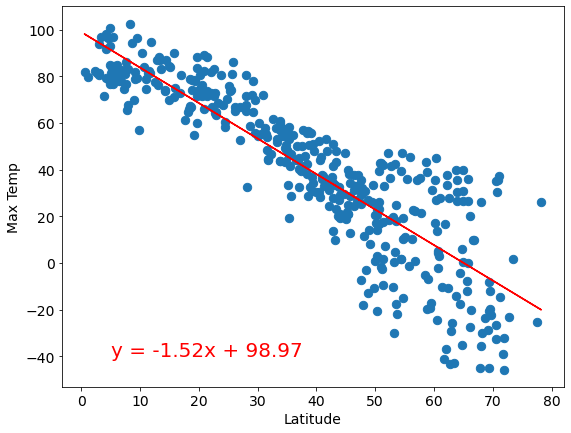

In [16]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regress(x_values, y_values, 'Latitude', 'Max Temp', (5, -40))

The r-value is: 0.6067660850679699


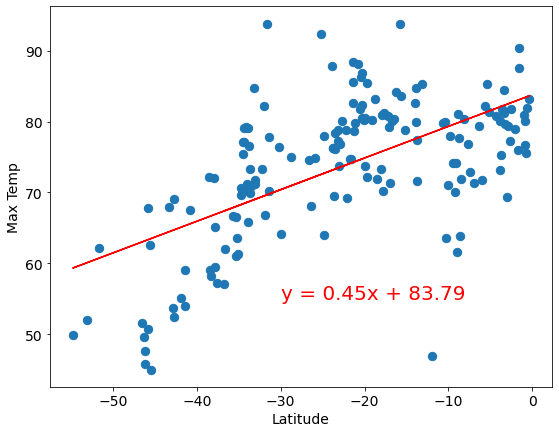

In [17]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regress(x_values, y_values, 'Latitude', 'Max Temp', (-30, 55))

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.502950282473807


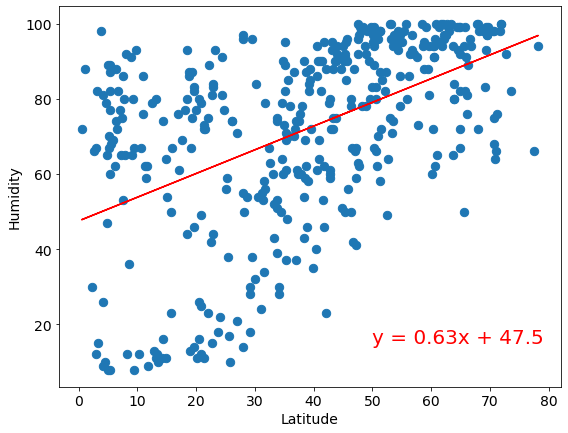

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regress(x_values, y_values, 'Latitude', 'Humidity', (50, 15))

The r-value is: 0.19119413666792226


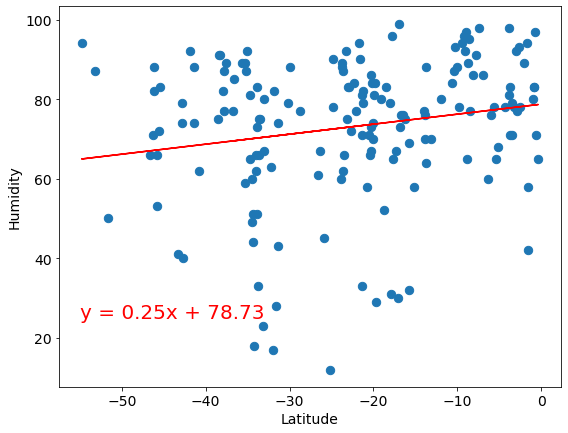

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regress(x_values, y_values, 'Latitude', 'Humidity', (-55, 25))

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1833192787033454


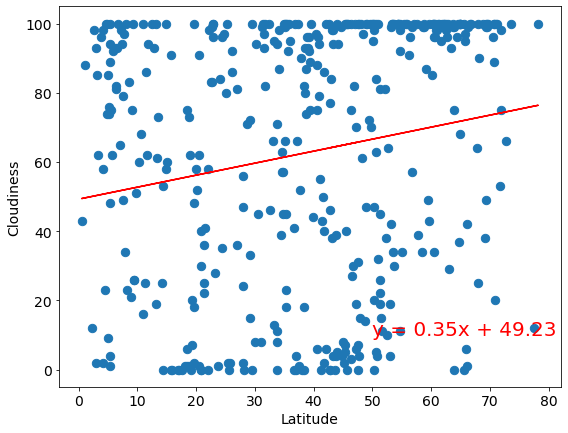

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regress(x_values, y_values, 'Latitude', 'Cloudiness', (50, 10))

The r-value is: 0.3305493131020476


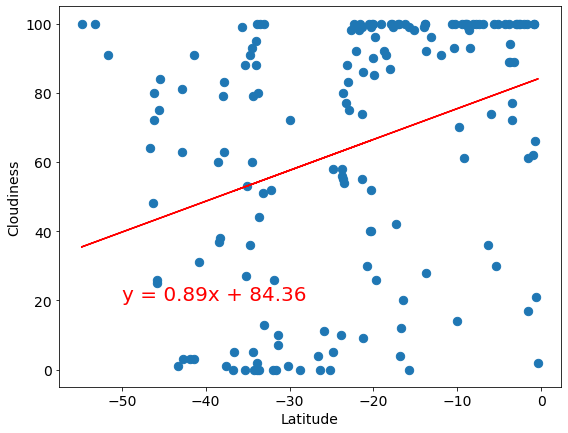

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regress(x_values, y_values, 'Latitude', 'Cloudiness', (-50, 20))

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.014609767346397826


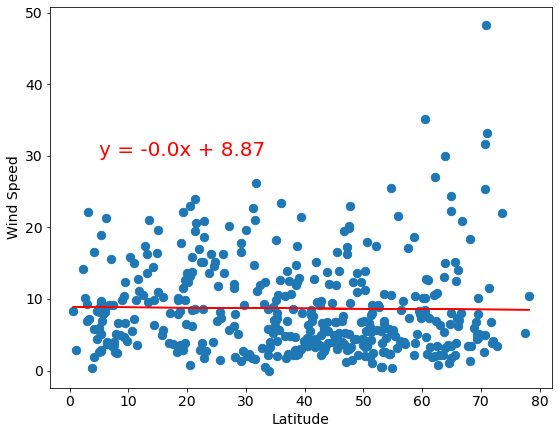

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regress(x_values, y_values, 'Latitude', 'Wind Speed', (5, 30))

The r-value is: -0.18556898386742424


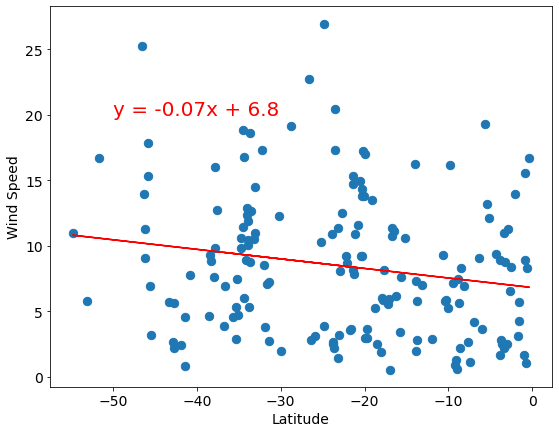

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regress(x_values, y_values, 'Latitude', 'Wind Speed', (-50, 20))